In [70]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:
import pandas as pd
import numpy as np
from google.colab import files
#path="https://raw.githubusercontent.com/laxmimerit/Covid-19-Preprocessed-Dataset/master/preprocessed/country_daywise.xlsx"
#dataframe= pd.read_csv(path, header=None)
df_india = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/India Covid Extended.xlsx")

In [72]:
df_india

,Sr.No,Date,Country,Confirmed,Deaths,Recovered,Active,New Cases,New Recovered,New Deaths
0,33499,2020-01-25,India,0,0,0,0,0,0,0
1,33500,2020-01-26,India,0,0,0,0,0,0,0
2,33501,2020-01-27,India,0,0,0,0,0,0,0
3,33502,2020-01-28,India,0,0,0,0,0,0,0
4,33503,2020-01-29,India,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
442,33941,2021-04-11,India,13527717,170179,12156529,1201009,168912,75086,904
443,33942,2021-04-12,India,13689453,171058,12253697,1264698,161736,97168,879
444,33943,2021-04-13,India,13873825,172085,12336036,1365704,184372,82339,1027
445,33944,2021-04-14,India,14074564,173123,12429564,1471877,200739,93528,1038


In [73]:
df_india.tail()

,Sr.No,Date,Country,Confirmed,Deaths,Recovered,Active,New Cases,New Recovered,New Deaths
442,33941,2021-04-11,India,13527717,170179,12156529,1201009,168912,75086,904
443,33942,2021-04-12,India,13689453,171058,12253697,1264698,161736,97168,879
444,33943,2021-04-13,India,13873825,172085,12336036,1365704,184372,82339,1027
445,33944,2021-04-14,India,14074564,173123,12429564,1471877,200739,93528,1038
446,33945,2021-04-15,India,14291917,174308,12547866,1569743,217353,118302,1185


In [74]:
df_india = df_india.drop(columns='Sr.No')
df_india = df_india.drop(df_india.index[[442]])

In [75]:
df_india.head()

,Date,Country,Confirmed,Deaths,Recovered,Active,New Cases,New Recovered,New Deaths
0,2020-01-25,India,0,0,0,0,0,0,0
1,2020-01-26,India,0,0,0,0,0,0,0
2,2020-01-27,India,0,0,0,0,0,0,0
3,2020-01-28,India,0,0,0,0,0,0,0
4,2020-01-29,India,0,0,0,0,0,0,0


In [76]:
df_india.isnull().sum()

Date             0
Country          0
Confirmed        0
Deaths           0
Recovered        0
Active           0
New Cases        0
New Recovered    0
New Deaths       0
dtype: int64

In [77]:
df_india.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 446 entries, 0 to 446
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           446 non-null    datetime64[ns]
 1   Country        446 non-null    object        
 2   Confirmed      446 non-null    int64         
 3   Deaths         446 non-null    int64         
 4   Recovered      446 non-null    int64         
 5   Active         446 non-null    int64         
 6   New Cases      446 non-null    int64         
 7   New Recovered  446 non-null    int64         
 8   New Deaths     446 non-null    int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 34.8+ KB


In [78]:
df_india["Date"] = pd.to_datetime(df_india["Date"])

In [79]:
#Grouping differnent types of cases as per the date
datewise = df_india.groupby(["Date"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum","Active":"sum"})

In [80]:
datewise.head()

,Confirmed,Recovered,Deaths,Active
Date,,,,
2020-01-25,0,0,0,0
2020-01-26,0,0,0,0
2020-01-27,0,0,0,0
2020-01-28,0,0,0,0
2020-01-29,0,0,0,0


In [81]:
datewise.columns

Index(['Confirmed', 'Recovered', 'Deaths', 'Active'], dtype='object')

In [82]:
datewise["WeekofYear"] = datewise.index.weekofyear
print(datewise['WeekofYear'])

Date
2020-01-25     4
2020-01-26     4
2020-01-27     5
2020-01-28     5
2020-01-29     5
              ..
2021-04-10    14
2021-04-12    15
2021-04-13    15
2021-04-14    15
2021-04-15    15
Name: WeekofYear, Length: 446, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)



In [83]:
datewise["Days Since"]=datewise.index-datewise.index[0]
datewise["Days Since"] = datewise["Days Since"].dt.days


In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

(array([183.,  25.,  19.,  15.,  19.,  28.,  39.,  88.,  22.,   8.]),
 array([       0. ,  1429191.7,  2858383.4,  4287575.1,  5716766.8,
         7145958.5,  8575150.2, 10004341.9, 11433533.6, 12862725.3,
        14291917. ]),
 <a list of 10 Patch objects>)

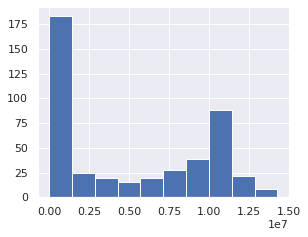

In [85]:
sns.set(rc={'figure.figsize':(4.5,3.5)})
plt.hist(datewise['Confirmed'])

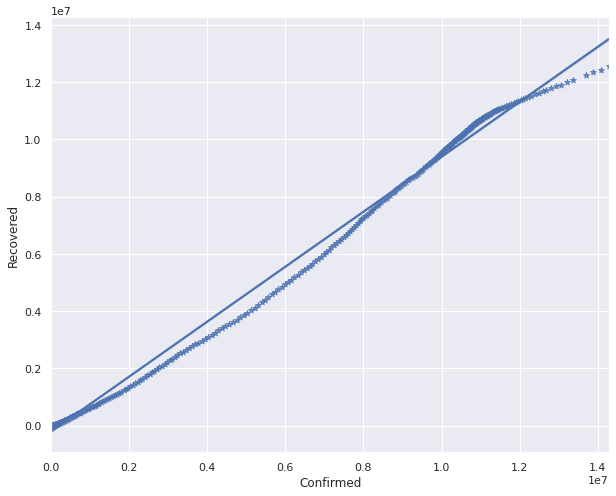

In [86]:
sns.set(rc={'figure.figsize':(10,8)})
sns.set(style='darkgrid')
sns.regplot(x=datewise['Confirmed'], y=datewise['Recovered'], marker="*")

##### Heatmap

In [87]:
datewise.style.background_gradient(cmap="Reds")

,Confirmed,Recovered,Deaths,Active,WeekofYear,Days Since
Date,,,,,,
2020-01-25 00:00:00,0,0,0,0,4,0
2020-01-26 00:00:00,0,0,0,0,4,1
2020-01-27 00:00:00,0,0,0,0,5,2
2020-01-28 00:00:00,0,0,0,0,5,3
2020-01-29 00:00:00,0,0,0,0,5,4
2020-01-30 00:00:00,1,0,0,1,5,5
2020-01-31 00:00:00,1,0,0,1,5,6
2020-02-01 00:00:00,1,0,0,1,5,7
2020-02-02 00:00:00,2,0,0,2,5,8


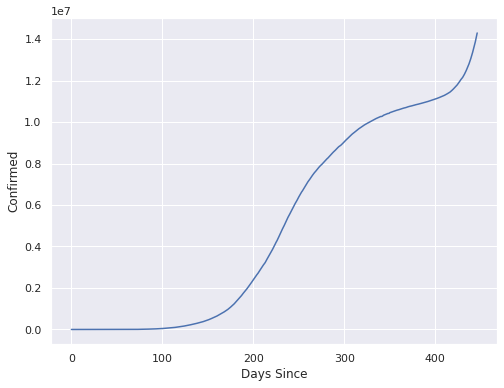

In [88]:
plt.figure(figsize=(8,6))
x_data, y_data = (datewise['Days Since'].values,datewise['Confirmed'].values)
plt.plot(x_data, y_data, 'b')
plt.xlabel('Days Since')
plt.ylabel('Confirmed')
plt.show()

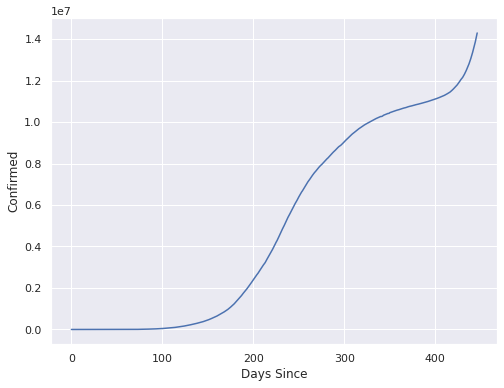

In [89]:
sns.set(rc={'figure.figsize':(8,6)})
sns.lineplot(x='Days Since', y='Confirmed',data=datewise)
plt.show()

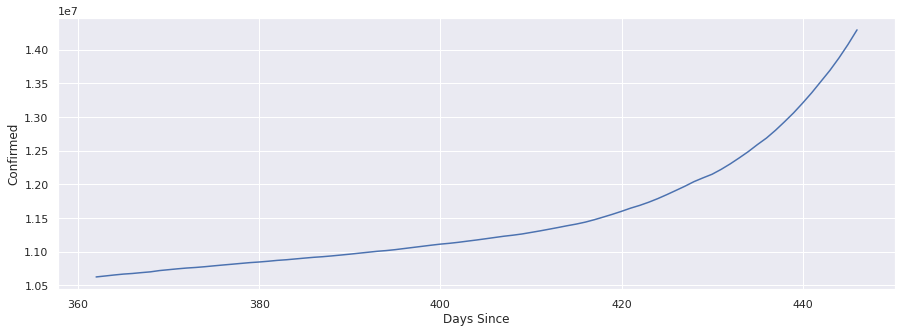

In [90]:
last_5_days=datewise.tail(84)
#Last 5 days confirmed cases line plot
sns.set(rc={'figure.figsize':(15,5)})
sns.lineplot(x='Days Since', y='Confirmed',data=last_5_days)
plt.show()

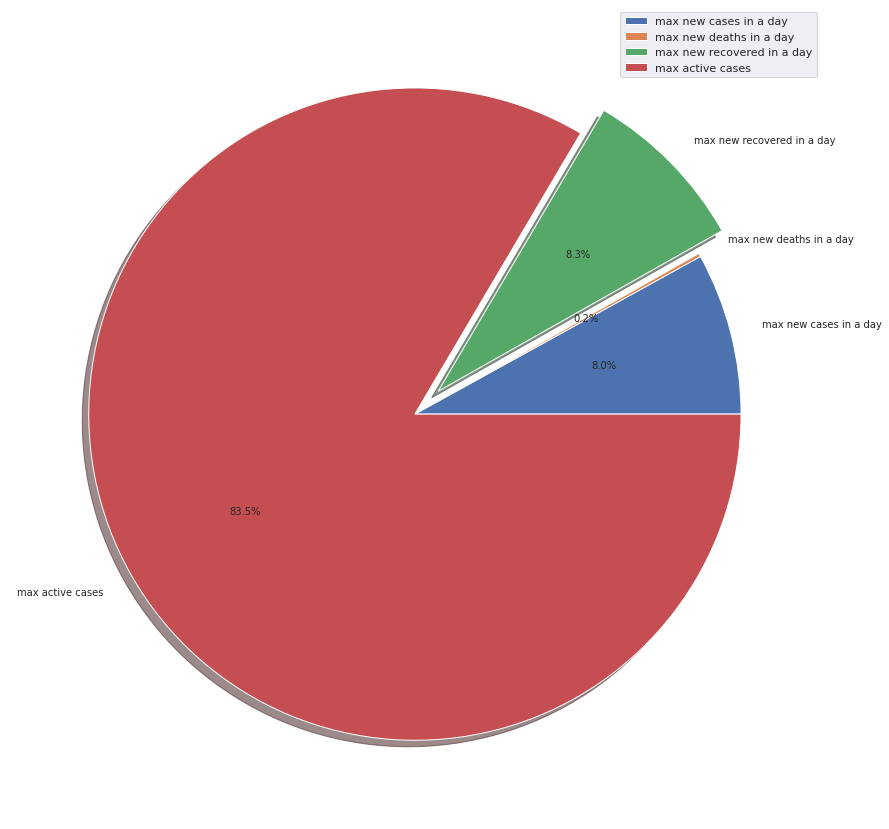

In [91]:
x=np.array([97894,2003,101468, 1017754])
l=["max new cases in a day","max new deaths in a day", "max new recovered in a day",'max active cases']
sns.set(rc={'figure.figsize':(25,15)})
my_explode = (0, 0, 0.1,0)
plt.pie(x,labels=l,autopct='%1.1f%%',shadow=True,explode=my_explode,textprops={'fontsize': 10})
plt.legend()
plt.show()

In [92]:
cdf = df_india[['Confirmed','Active','Deaths','New Cases']]
cdf.head(9)

,Confirmed,Active,Deaths,New Cases
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
5,1,1,0,1
6,1,1,0,0
7,1,1,0,0
8,2,2,0,1


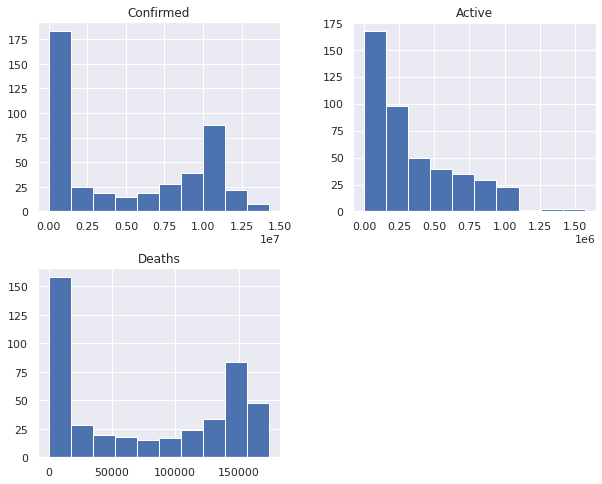

In [93]:
sns.set(rc={'figure.figsize':(10,8)})
viz = datewise[['Confirmed','Active','Deaths']]
viz.hist()
plt.show()

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
from datetime import timedelta
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from statsmodels.tsa.api import Holt

In [95]:
df_india.head()

,Date,Country,Confirmed,Deaths,Recovered,Active,New Cases,New Recovered,New Deaths
0,2020-01-25,India,0,0,0,0,0,0,0
1,2020-01-26,India,0,0,0,0,0,0,0
2,2020-01-27,India,0,0,0,0,0,0,0
3,2020-01-28,India,0,0,0,0,0,0,0
4,2020-01-29,India,0,0,0,0,0,0,0


In [96]:
datewise.head(2)

,Confirmed,Recovered,Deaths,Active,WeekofYear,Days Since
Date,,,,,,
2020-01-25,0,0,0,0,4,0
2020-01-26,0,0,0,0,4,1


In [97]:
datewise['Active'] = datewise['Active'].replace(0,1)
datewise['Recovered'] = datewise['Recovered'].replace(0,1)
datewise['Deaths'] = datewise['Deaths'].replace(0,1)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52]), <a list of 53 Text major ticklabel objects>)

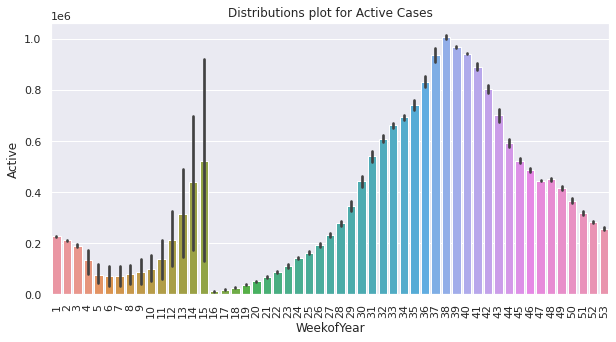

In [98]:
plt.figure(figsize=(10,5))
sns.barplot(x=datewise['WeekofYear'],y=datewise['Active'])
plt.title("Distributions plot for Active Cases")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52]), <a list of 53 Text major ticklabel objects>)

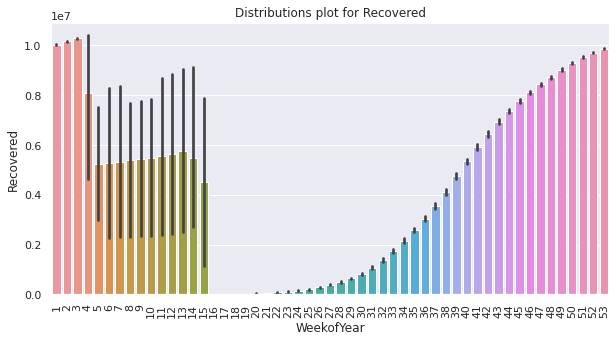

In [99]:
plt.figure(figsize=(10,5))
sns.barplot(x=datewise['WeekofYear'],y=datewise['Recovered'])
plt.title("Distributions plot for Recovered")
plt.xticks(rotation=90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

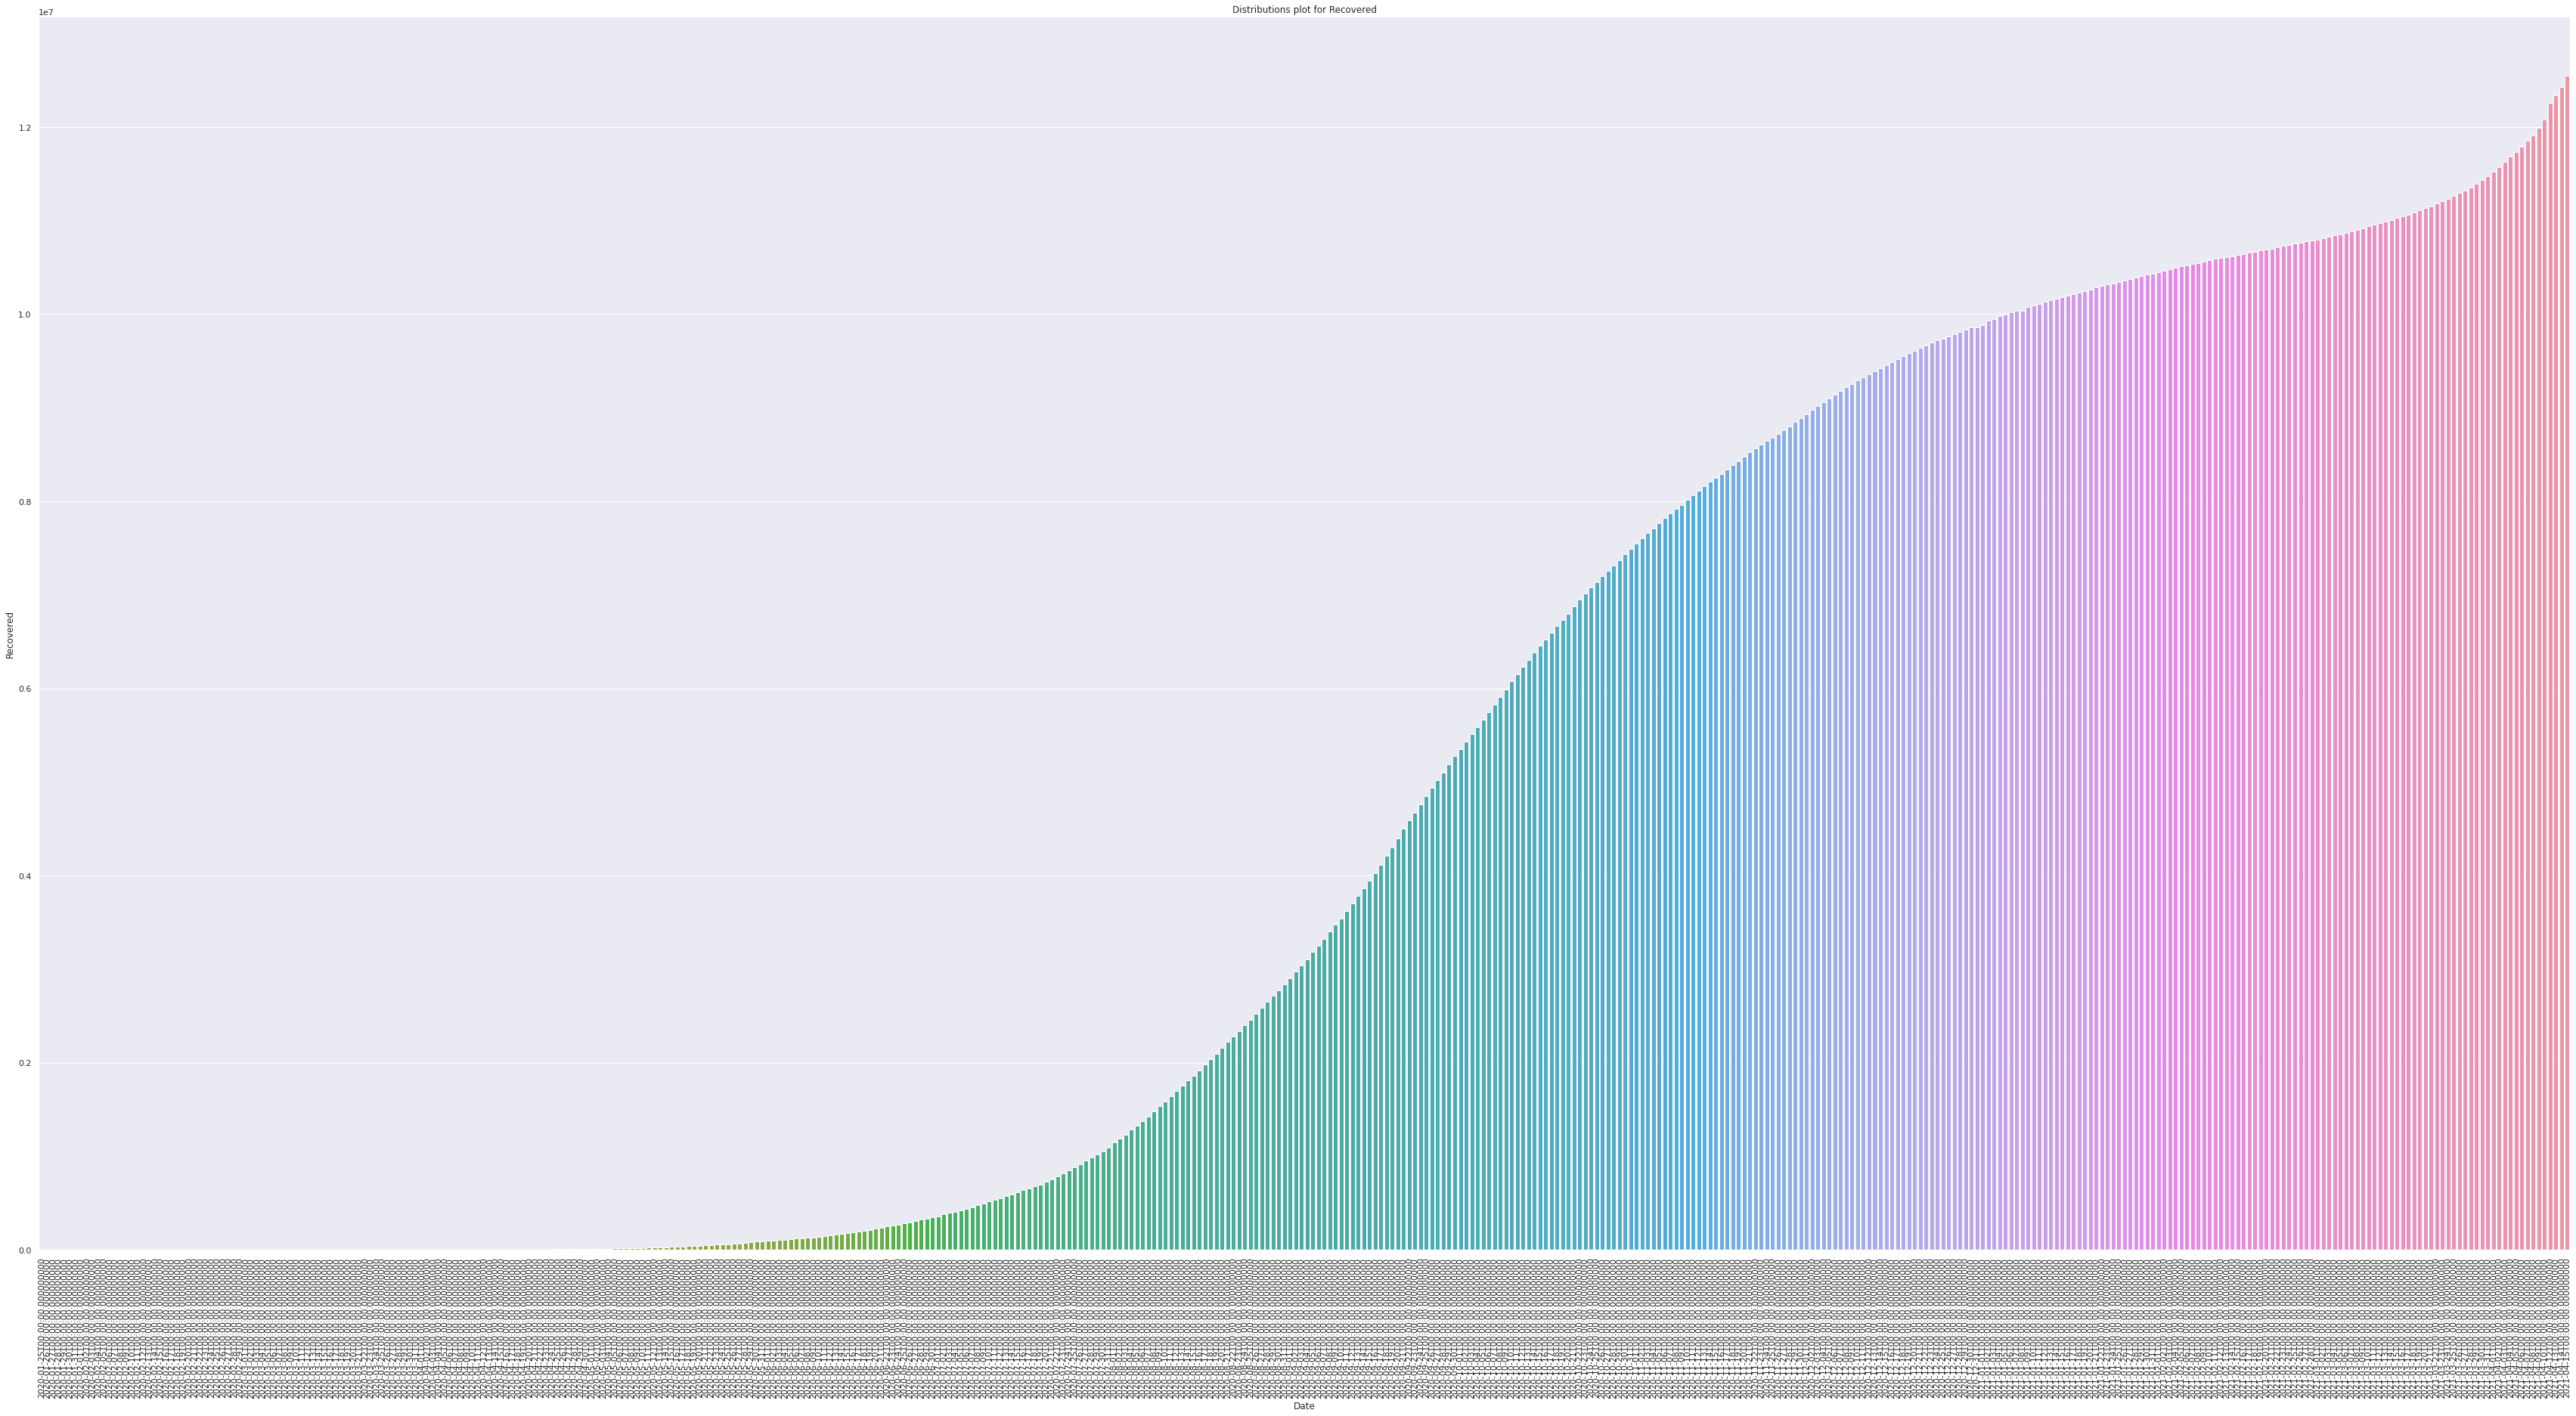

In [100]:
plt.figure(figsize=(60,30))
sns.barplot(x=df_india['Date'],y=df_india['Recovered'])
plt.title("Distributions plot for Recovered")
plt.xticks(rotation=90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

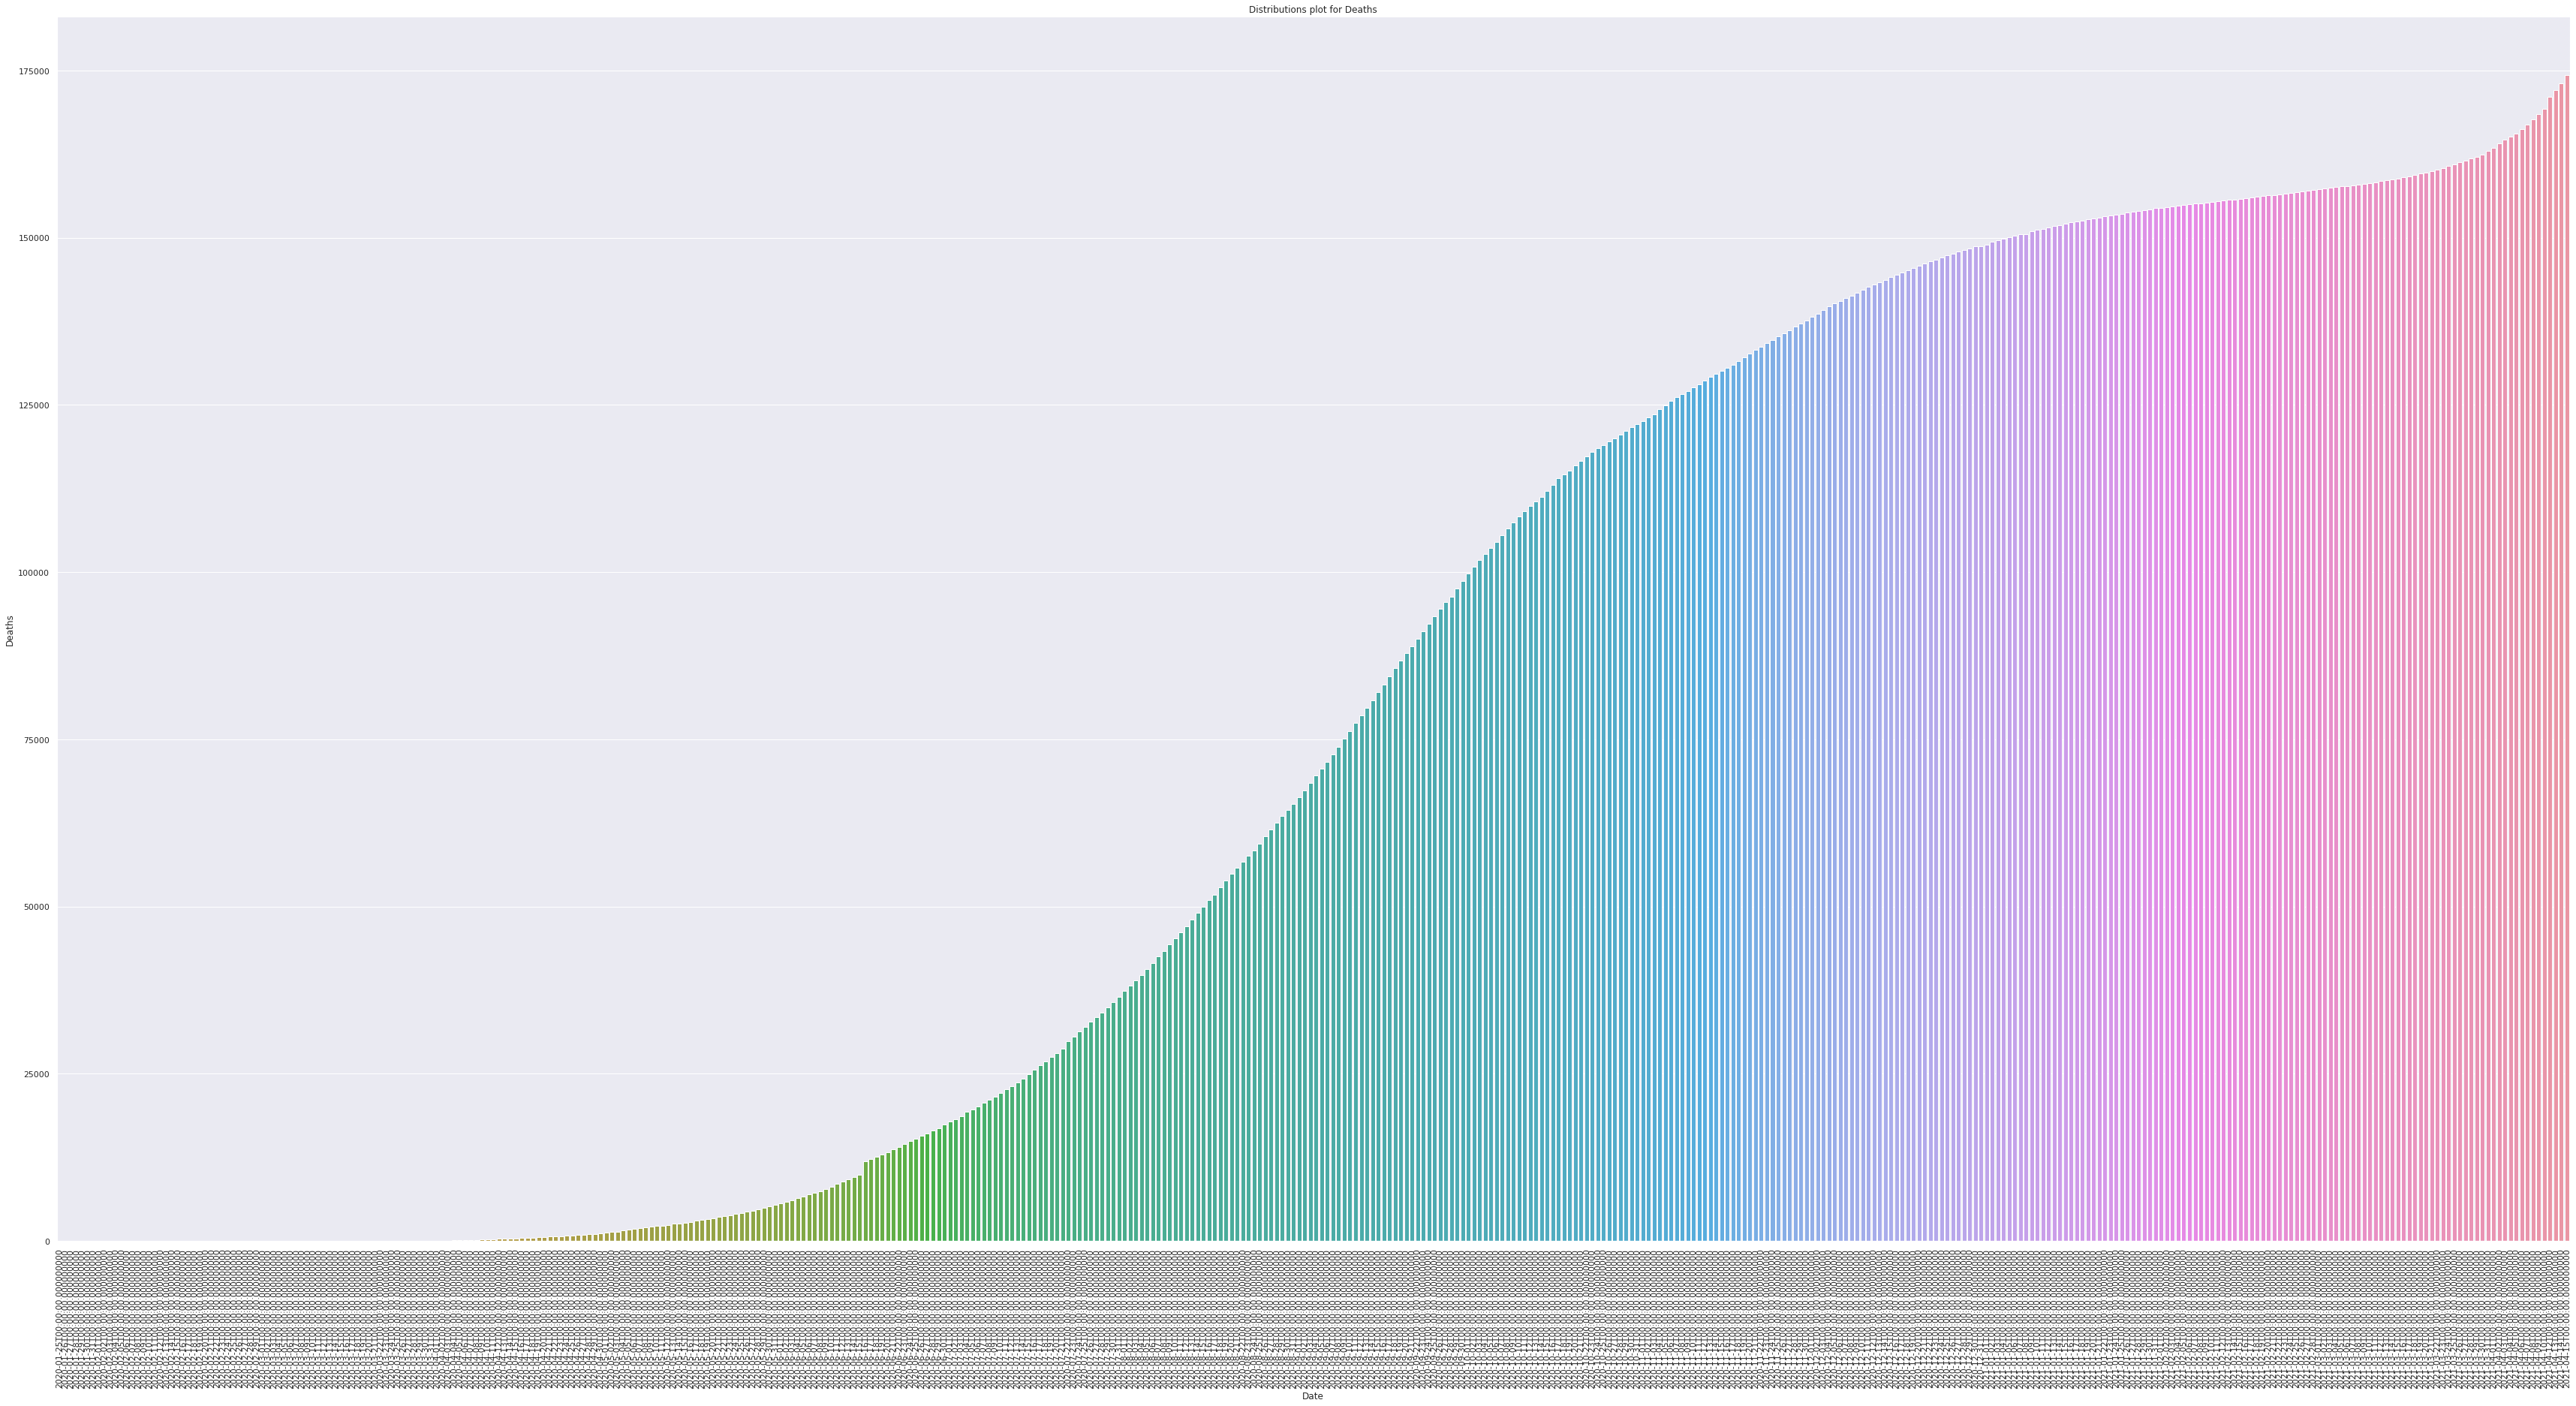

In [101]:
plt.figure(figsize=(60,30))
sns.barplot(x=df_india['Date'],y=df_india['Deaths'])
plt.title("Distributions plot for Deaths")
plt.xticks(rotation=90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

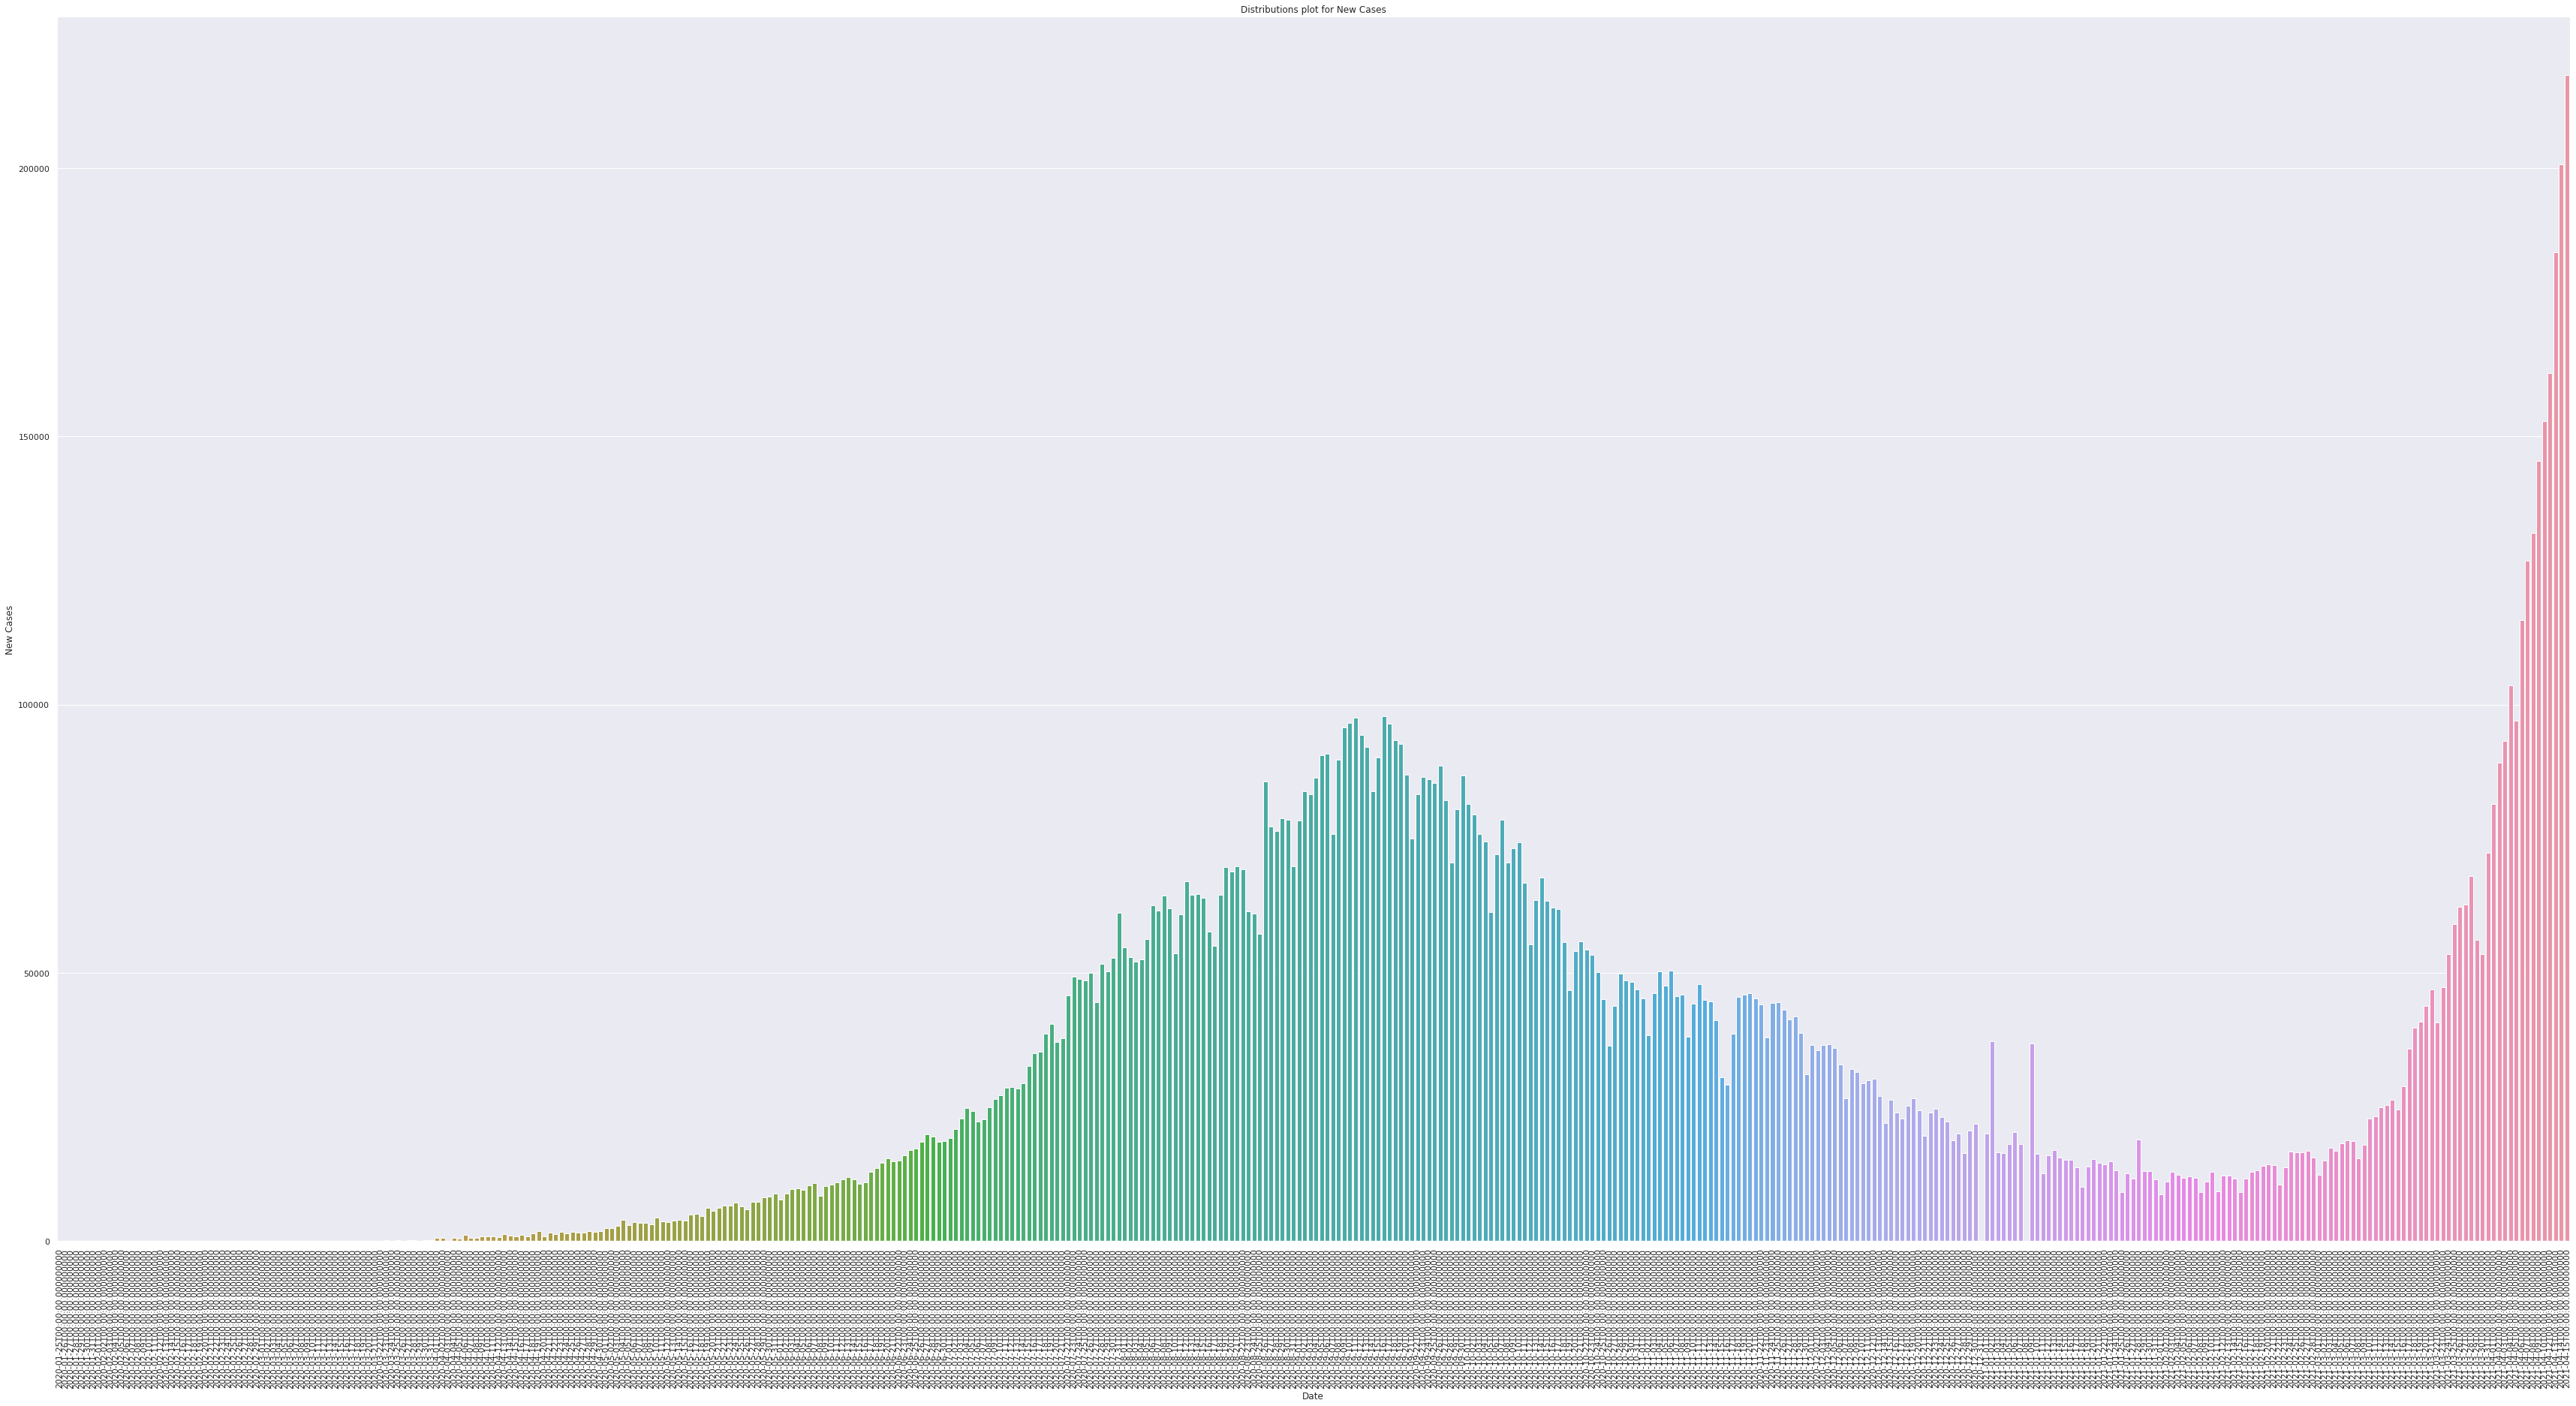

In [102]:
plt.figure(figsize=(60,30))
sns.barplot(x=df_india['Date'],y=df_india['New Cases'])
plt.title("Distributions plot for New Cases")
plt.xticks(rotation=90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

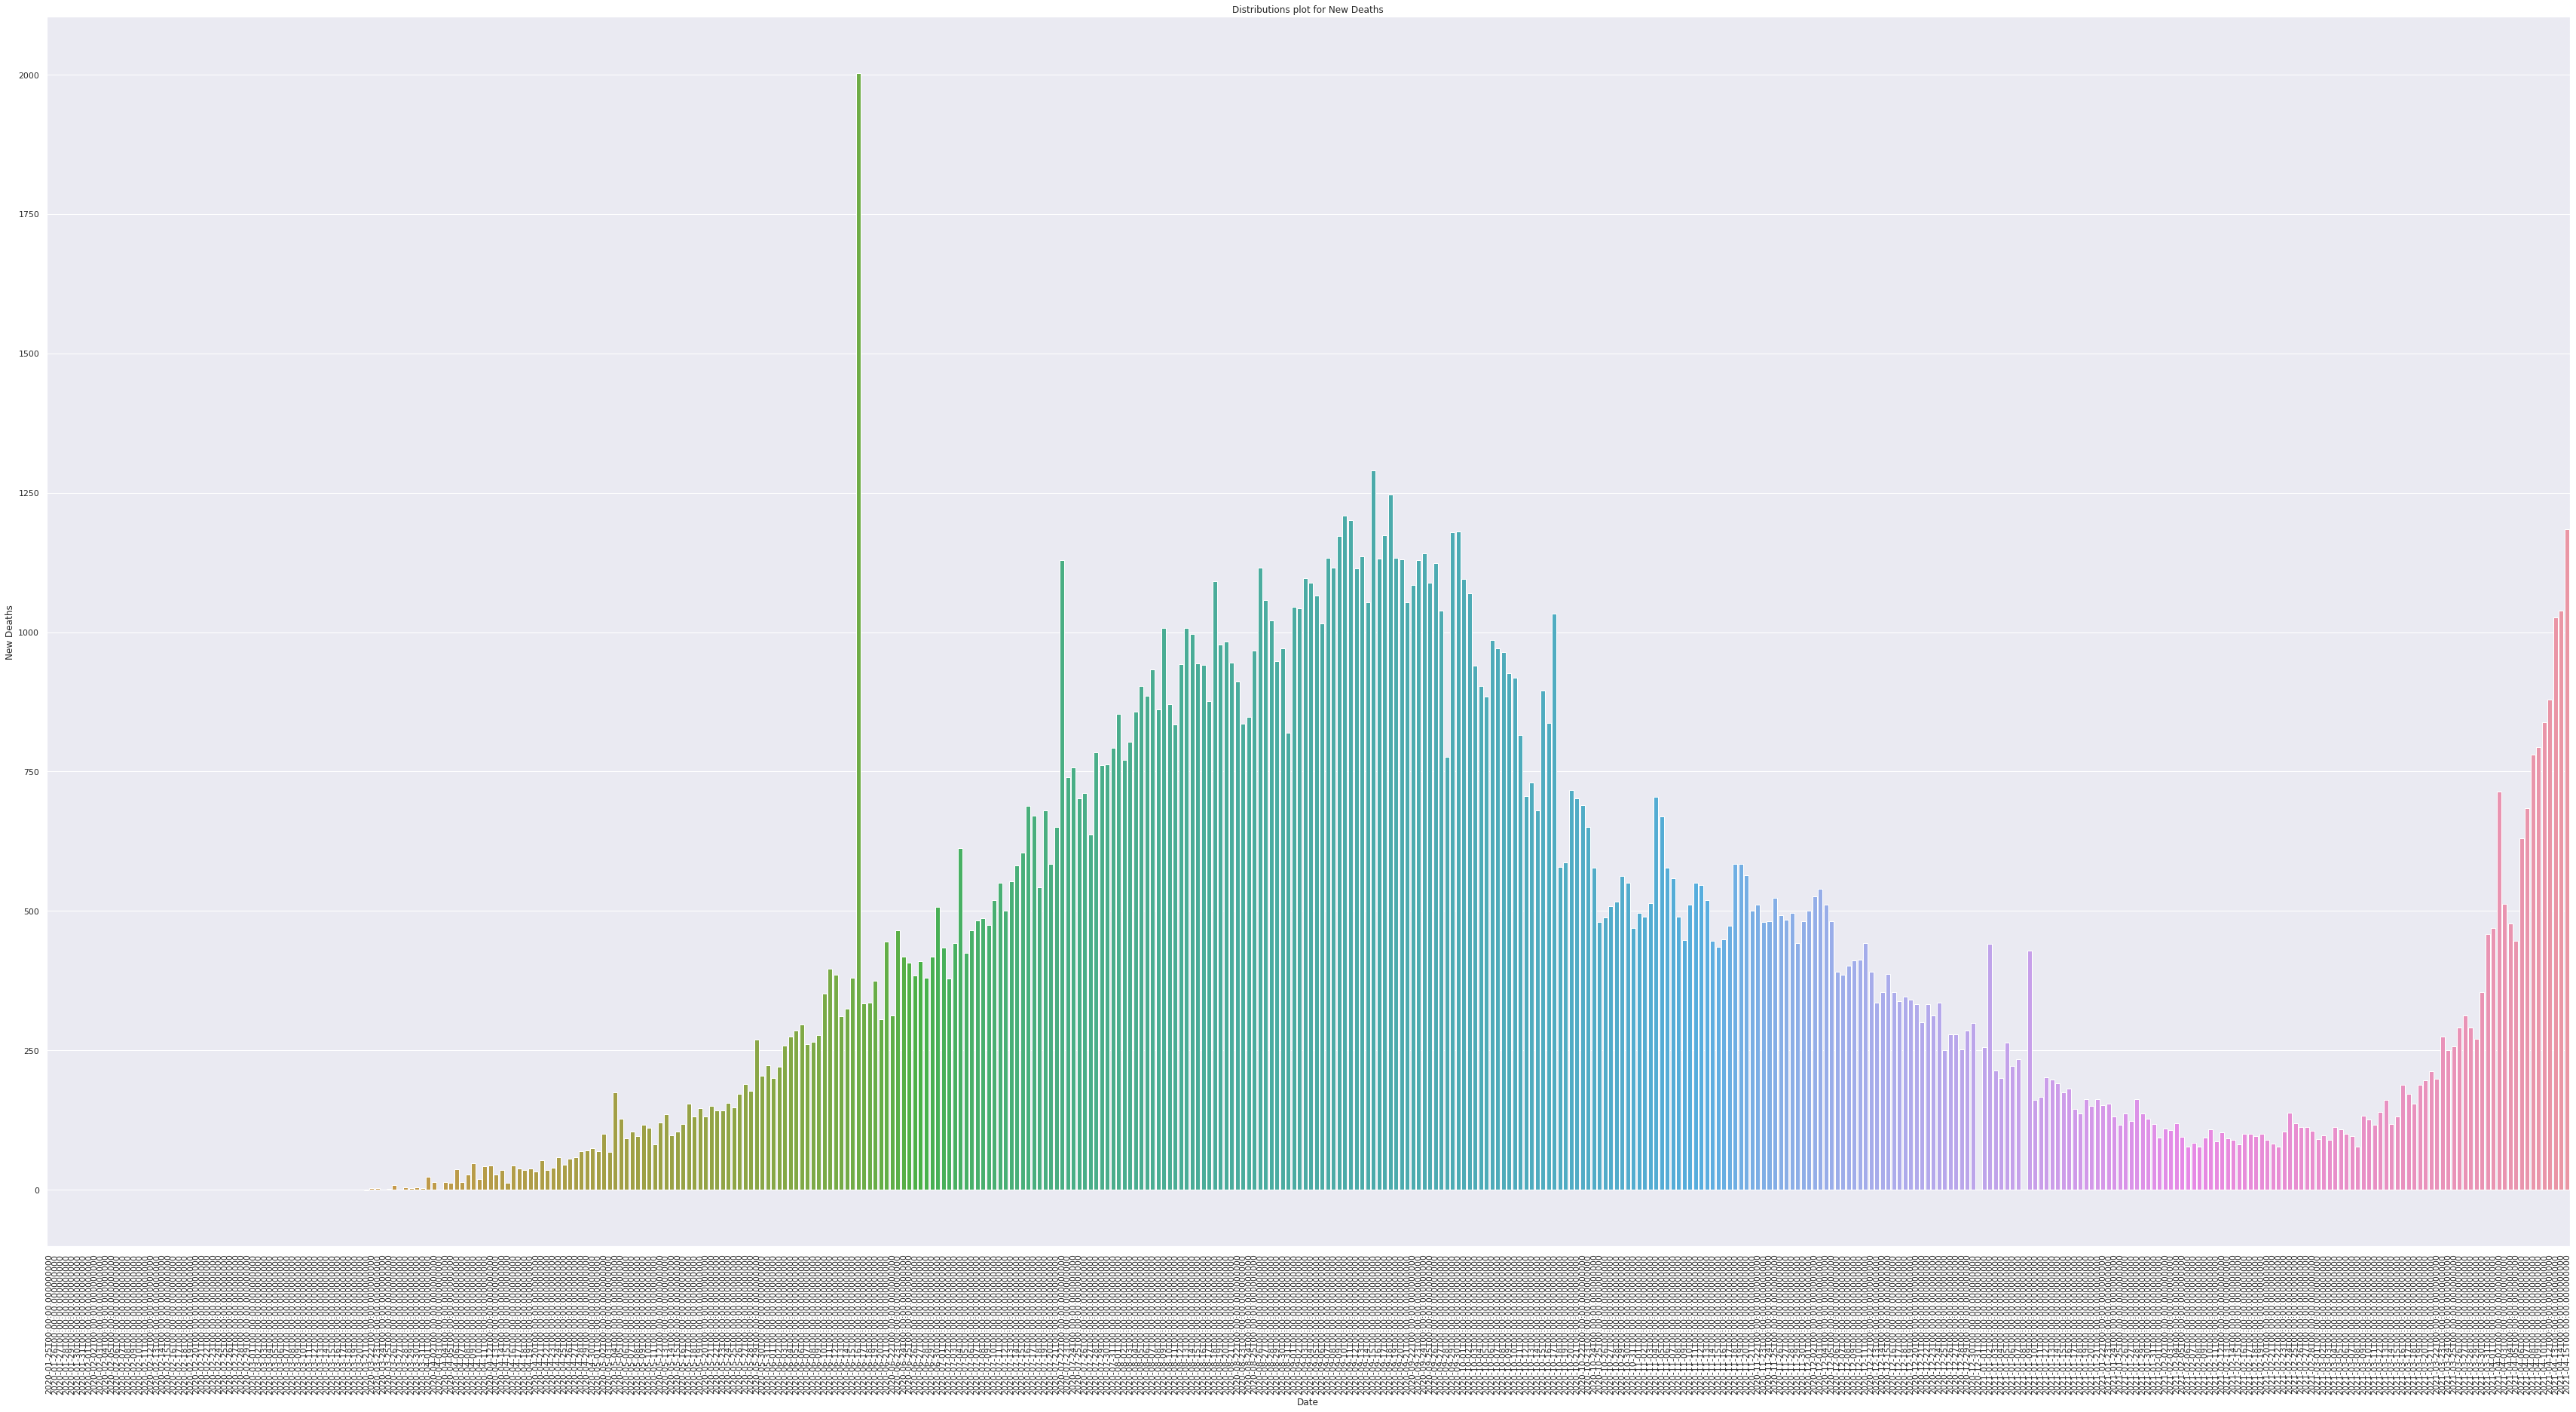

In [103]:
plt.figure(figsize=(60,30))
sns.barplot(x=df_india['Date'],y=df_india['New Deaths'])
plt.title("Distributions plot for New Deaths")
plt.xticks(rotation=90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

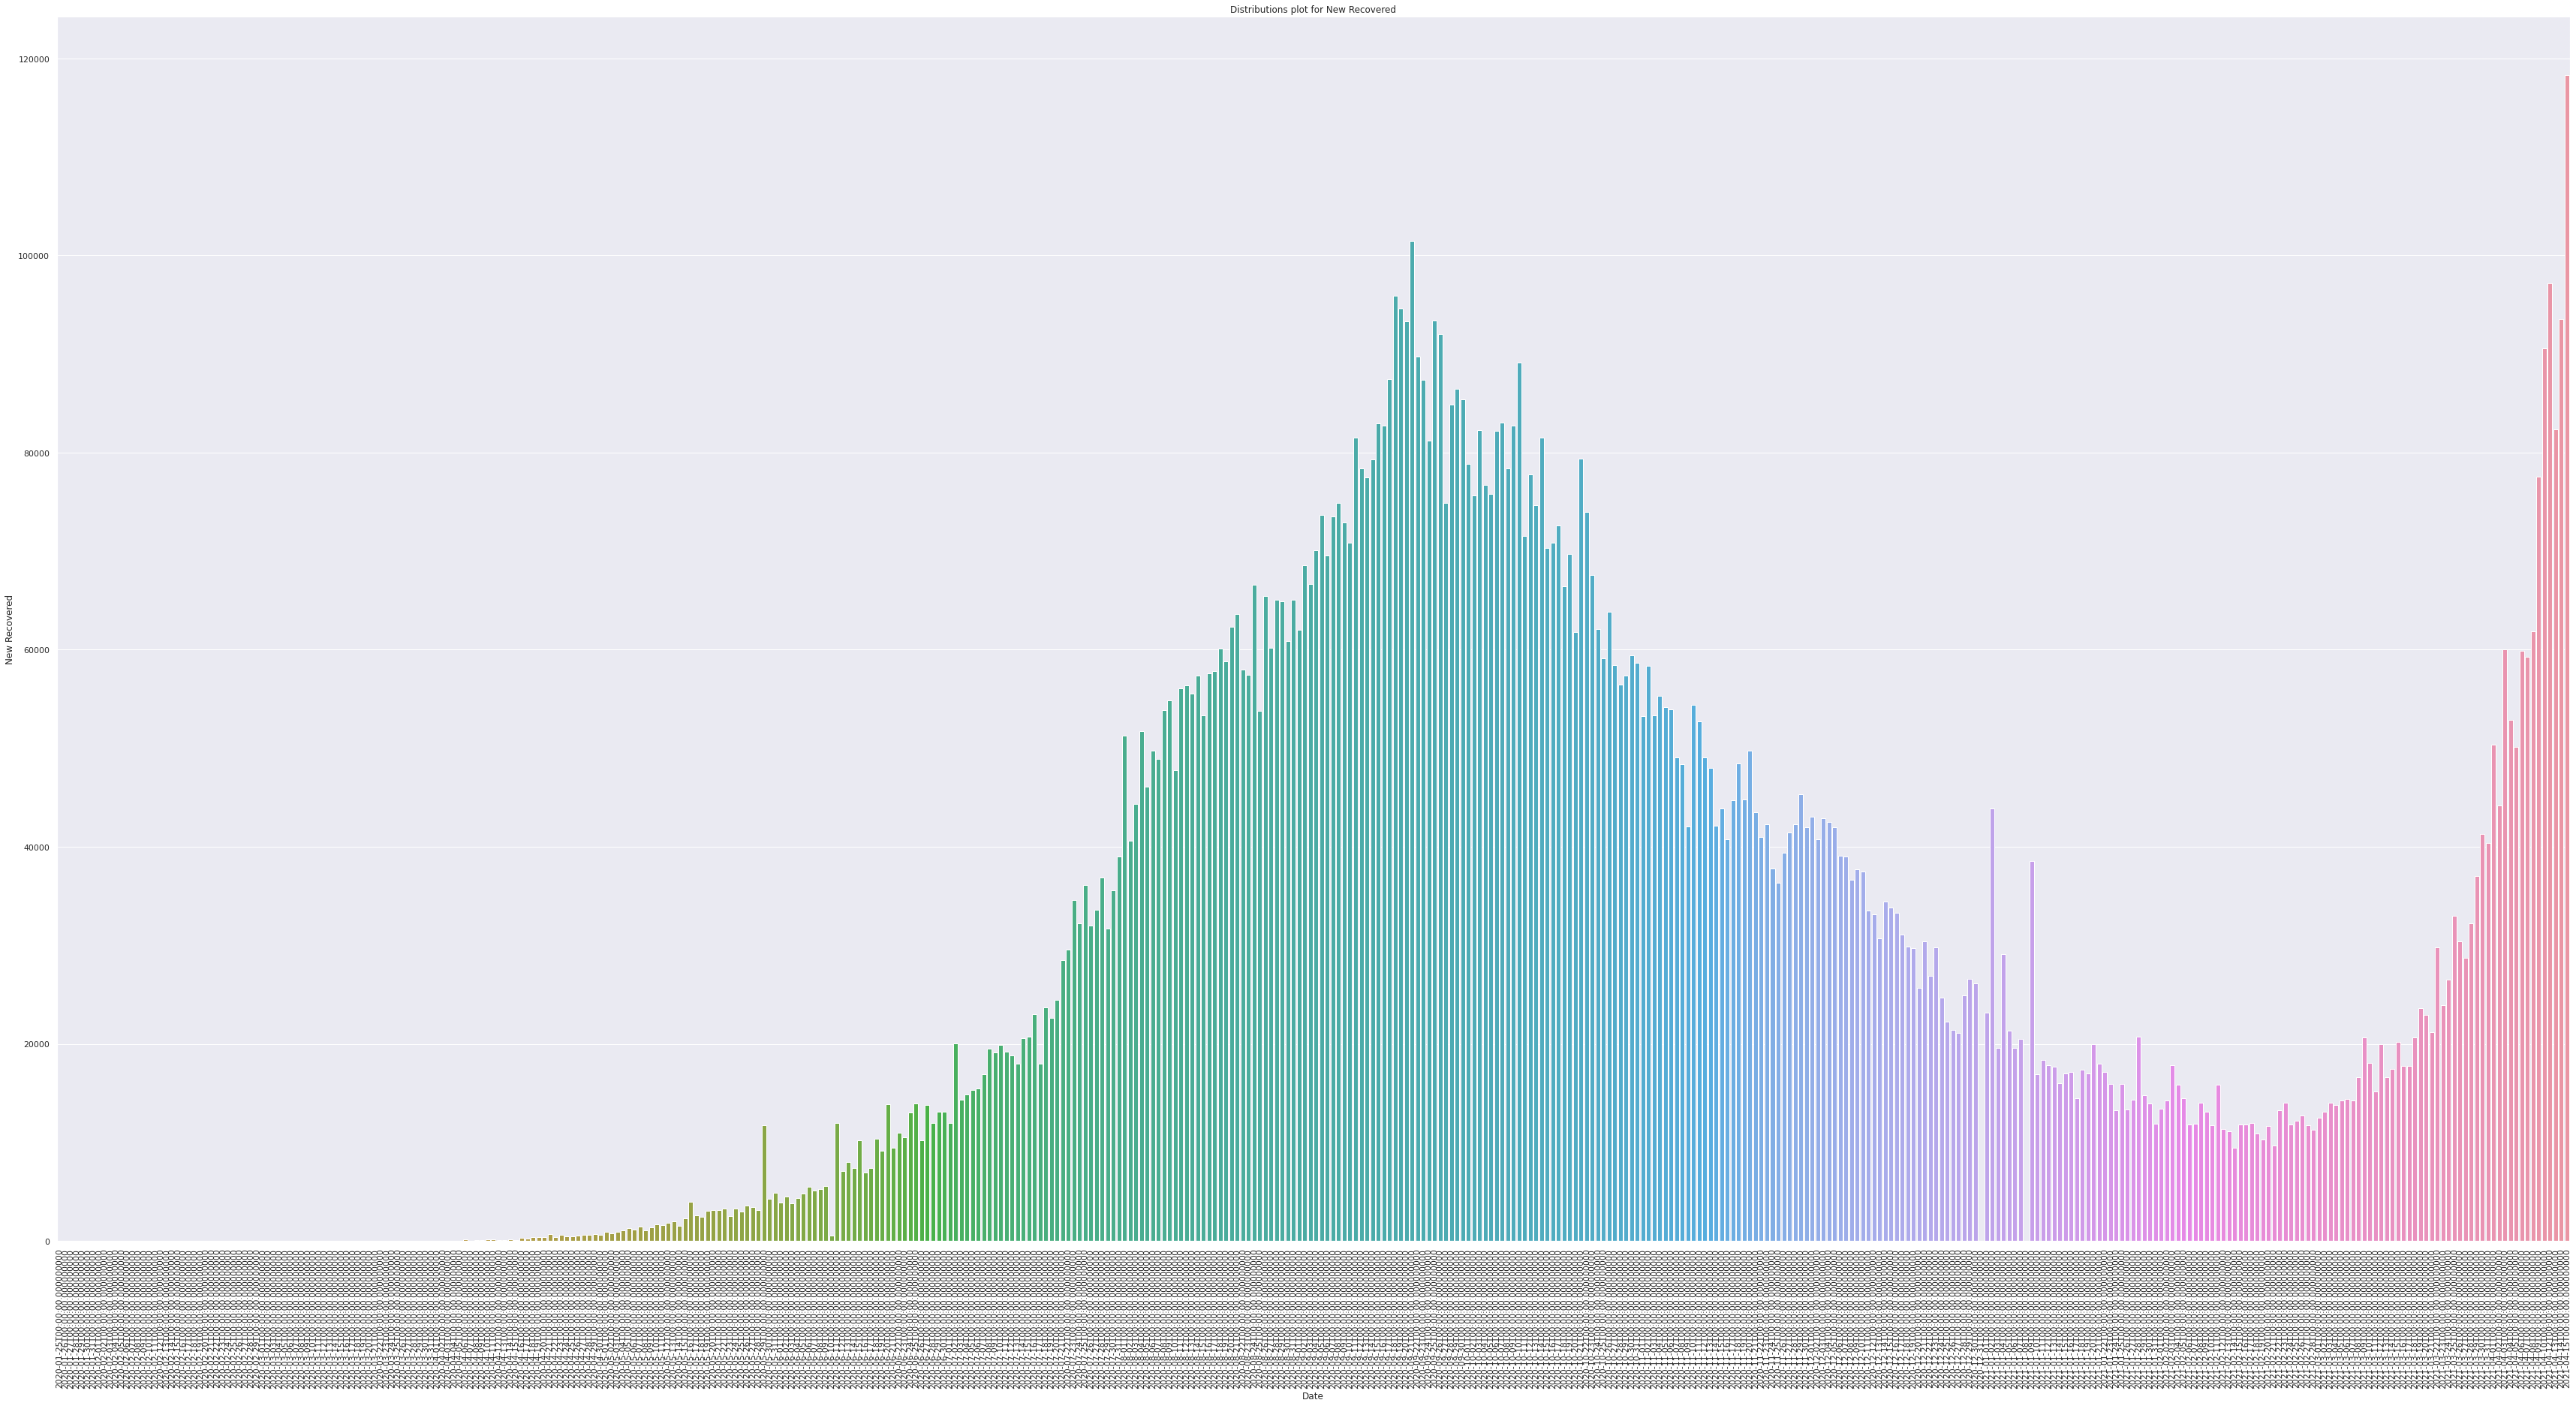

In [104]:
plt.figure(figsize=(60,30))
sns.barplot(x=df_india['Date'],y=df_india['New Recovered'])
plt.title("Distributions plot for New Recovered")
plt.xticks(rotation=90)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Weekly Progress of different types of cases')

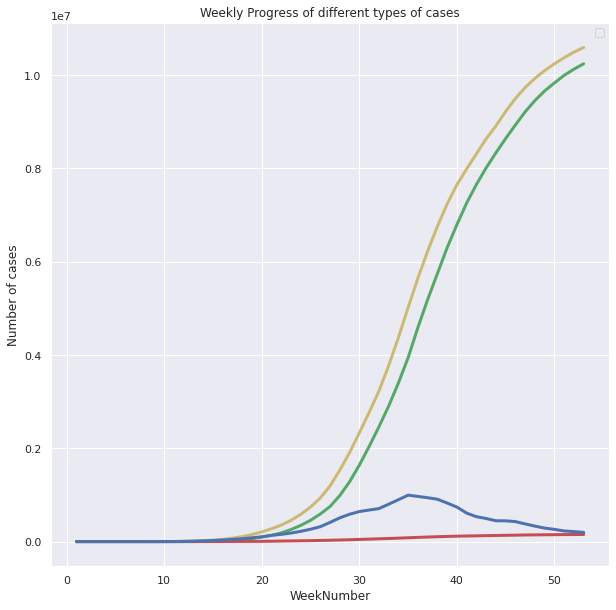

In [105]:
datewise["WeekofYear"] = datewise.index.weekofyear
week_num = []
weekwise_confirmed = []
weekwise_recovered = []
weekwise_deaths = []
weekwise_active = []
w = 1
for i in list(datewise["WeekofYear"].unique()):
    weekwise_confirmed.append(datewise[datewise["WeekofYear"]==i]["Confirmed"].iloc[1])
    weekwise_recovered.append(datewise[datewise["WeekofYear"]==i]["Recovered"].iloc[1])
    weekwise_deaths.append(datewise[datewise["WeekofYear"]==i]["Deaths"].iloc[1])
    weekwise_active.append(datewise[datewise["WeekofYear"]==i]["Active"].iloc[1])
    week_num.append(w)
    w=w+1
plt.figure(figsize=(10,10))
plt.plot(week_num,weekwise_confirmed,linewidth=3,color = 'y' )
plt.plot(week_num,weekwise_recovered,linewidth =3, color = 'g')
plt.plot(week_num,weekwise_deaths,linewidth = 3, color = 'r')
plt.plot(week_num,weekwise_active,linewidth = 3, color = 'b')
plt.xlabel("WeekNumber")
plt.legend()
plt.ylabel("Number of cases")
plt.title("Weekly Progress of different types of cases")

Text(0.5, 1.0, 'Weekly Progress of different types of cases')

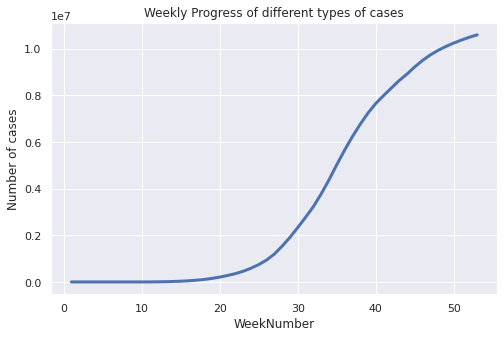

In [106]:
plt.figure(figsize=(8,5))
plt.plot(week_num,weekwise_confirmed,linewidth=3)
plt.xlabel("WeekNumber")
plt.ylabel("Number of cases")
plt.title("Weekly Progress of different types of cases")

Text(0.5, 1.0, 'Weekly Progress of different types of cases')

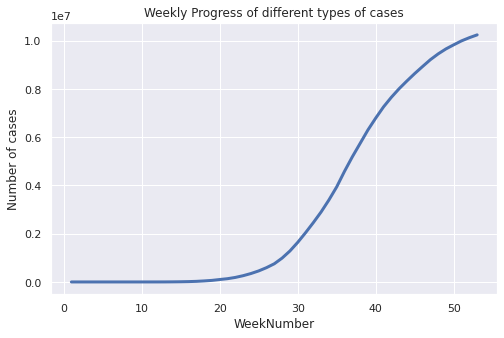

In [107]:
plt.figure(figsize=(8,5))
plt.plot(week_num,weekwise_recovered,linewidth=3)
plt.xlabel("WeekNumber")
plt.ylabel("Number of cases")
plt.title("Weekly Progress of different types of cases")

Text(0.5, 1.0, 'Weekly Progress of different types of cases')

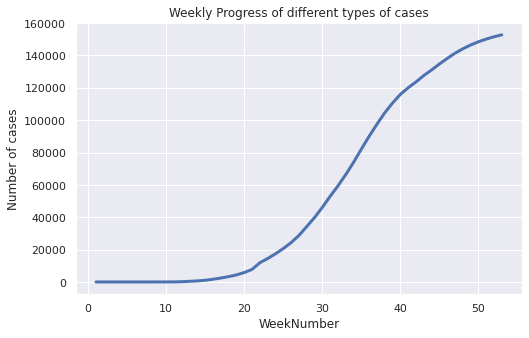

In [108]:
plt.figure(figsize=(8,5))
plt.plot(week_num,weekwise_deaths,linewidth=3)
plt.xlabel("WeekNumber")
plt.ylabel("Number of cases")
plt.title("Weekly Progress of different types of cases")

Text(0.5, 1.0, 'Weekly Progress of different types of cases')

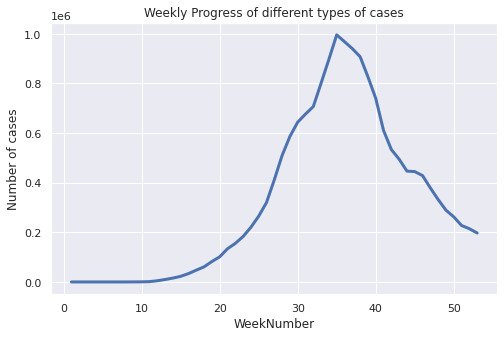

In [109]:
plt.figure(figsize=(8,5))
plt.plot(week_num,weekwise_active,linewidth=3)
plt.xlabel("WeekNumber")
plt.ylabel("Number of cases")
plt.title("Weekly Progress of different types of cases")

Average increase in number of Confirmed cases everyday: 32045.0
Average increase in number of Recovered cases everyday: 28134.0
Average increase in number of Death cases everyday: 391.0


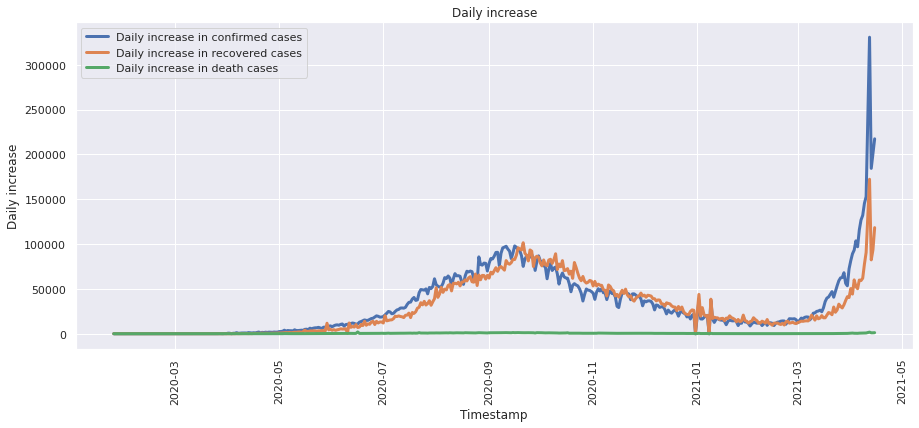

In [110]:
print("Average increase in number of Confirmed cases everyday:",np.round(datewise["Confirmed"].diff().fillna(0).mean()))
print("Average increase in number of Recovered cases everyday:",np.round(datewise["Recovered"].diff().fillna(0).mean()))
print("Average increase in number of Death cases everyday:",np.round(datewise["Deaths"].diff().fillna(0).mean()))

plt.figure(figsize=(15,6))
plt.plot(datewise["Confirmed"].diff().fillna(0),label="Daily increase in confirmed cases",linewidth=3)
plt.plot(datewise["Recovered"].diff().fillna(0),label="Daily increase in recovered cases",linewidth=3)
plt.plot(datewise["Deaths"].diff().fillna(0),label="Daily increase in death cases",linewidth=3)
plt.xlabel("Timestamp")
plt.ylabel("Daily increase")
plt.title("Daily increase")
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [111]:
datewise['Active'] = datewise['Active'].replace(1,3)
datewise['Recovered'] = datewise['Recovered'].replace(1,3)
datewise['Deaths'] = datewise['Deaths'].replace(1,3)

In [112]:
import plotly.express as px
fig = px.bar(datewise, x='WeekofYear', y='Confirmed',color='Confirmed')
fig.show()

In [113]:
df_india['WeekofYear'] = datewise['WeekofYear']

In [114]:
import plotly.express as px
fig = px.bar(datewise, x='WeekofYear', y='Deaths',color='Deaths')
fig.show()

In [115]:
datewise.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 446 entries, 2020-01-25 to 2021-04-15
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Confirmed   446 non-null    int64
 1   Recovered   446 non-null    int64
 2   Deaths      446 non-null    int64
 3   Active      446 non-null    int64
 4   WeekofYear  446 non-null    int64
 5   Days Since  446 non-null    int64
dtypes: int64(6)
memory usage: 44.4 KB


In [116]:
datewise.head(2)

,Confirmed,Recovered,Deaths,Active,WeekofYear,Days Since
Date,,,,,,
2020-01-25,0,3,3,3,4,0
2020-01-26,0,3,3,3,4,1


In [117]:
import plotly.express as px
fig = px.bar(datewise, x='WeekofYear', y='Active',color='Active')
fig.show()

In [118]:
import plotly.express as px
fig = px.bar(datewise, x='WeekofYear', y='Deaths',color='Deaths')
fig.show()

In [119]:
import plotly.express as px
fig = px.bar(datewise, x='Days Since', y='Confirmed',color='Confirmed')
fig.show()

In [120]:
import plotly.express as px
fig = px.bar(datewise, x='Days Since', y='Active',color='Active')
fig.show()

In [121]:
import plotly.express as px
fig = px.bar(datewise, x='Days Since', y='Deaths',color='Deaths')
fig.show()

In [122]:
import plotly.express as px
fig = px.bar(datewise, x=datewise.index, y='Deaths',color='Deaths')
fig.show()

In [123]:
import plotly.express as px
fig = px.bar(datewise, x=datewise.index, y='Active',color='Active')
fig.show()

In [124]:
import plotly.express as px
fig = px.bar(datewise, x=datewise.index, y='Recovered',color='Recovered')
fig.show()

In [125]:
import plotly.graph_objects as go

# Create random data with numpy
#import numpy as np
#np.random.seed(1)

#N = 100
#random_x = np.linspace(0, 1, N)
#random_y0 = np.random.randn(N) + 5
#random_y1 = np.random.randn(N)
#random_y2 = np.random.randn(N) - 5

# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise['Confirmed'],
                    mode='lines',
                    name='Confirmed'))
fig.add_trace(go.Scatter(x=datewise.index, y=datewise['Deaths'],
                    mode='lines',
                    name='Deaths'))
fig.add_trace(go.Scatter(x=datewise.index, y=datewise['Active'],
                    mode='lines', name='Active'))
fig.add_trace(go.Scatter(x=datewise.index, y=datewise['Recovered'],
                    mode='lines', name='Recovered'))

fig.show()

In [126]:
df_india.columns

Index(['Date', 'Country', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New Cases', 'New Recovered', 'New Deaths', 'WeekofYear'],
      dtype='object')

In [127]:
import plotly.express as px
fig = px.bar(df_india, x='Date', y='New Cases')
fig.show()

In [128]:
import plotly.express as px
fig = px.bar(df_india, x='Date', y='New Recovered')
fig.show()

In [129]:
fig = px.bar(df_india, x='Date', y='New Deaths')
fig.show()

In [130]:
pip install pywedge

In [131]:
import pywedge as pw

In [132]:
x = pw.Pywedge_Charts(datewise, c=None, y="Deaths")

In [133]:
charts = x.make_charts()

HTML(value='<h2>Pywedge Make_Charts </h2>')